## 개요

- 정의: 간단히 말해 이진 분류기.
- 목적: 초평면을 기준으로 한쪽 면으로 동일한 데이터가 놓이게 평평한 경계를 만드는 것.
- 초평면: n차원 공간을 나누기 위해 사용하는 n-1차원의 부분 공간. (ex. 3차원이면 2차원. 2차원이면 1차원(직선))

서포트 벡터 머신은 훈련 데이터를 분류하기 위해 클래스 사이의 마진을 최대화하는 초평면을 찾는다. (ex. 2차원의 두 클래스를 분할하는 경우 곧게 뻗은 직선을 떠올릴 수 있다.)
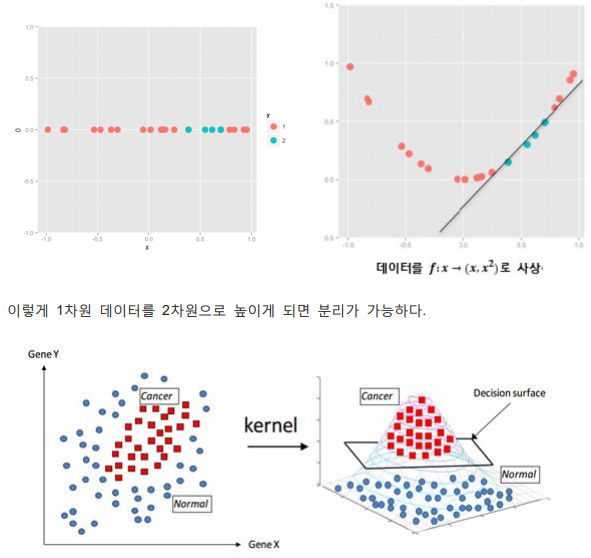

### 선형 분류기 훈련
샘플 분류를 위해 모델을 훈련한다. -> SVC(서포트 벡터 분류기)를 사용해 클래스 간의 마진을 최대화하는 초평면을 찾는다.

In [9]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터
iris = datasets.load_iris()
features = iris.data[:100,:2]   # 두 개의 변수만 추출 . 간단히 이진분류를 하기 위해서다 
target = iris.target[:100]   # 100개의 target 데이터만 추출.

# 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# SVC 생성
svc = LinearSVC(C=1.0)   # C는 SVC에서 오차에 부과하는 페널티. Default value가 1.0이다.

model1 = svc.fit(features_standardized, target) 

LinearSCV 클래스는 간단한 SVC를 구현. SVC는 고차원 데이터에서 잘 작동한다. 원리는 여기 링크로 https://onikaze.tistory.com/375
SVC의 특징:
- SVC는 다중 클래스 환경에 잘 동작한다.
- 초평면은 완전 선형이다(곡선이 아니다).

일반적으로 클래스를 완벽하게 구분할 수는 없다. 그렇기에 초평면의 마진을 최대화하는 SVC와 분류 오차를 최소화하는 것 사이에 균형을 잡아야 한다. 그 역할을 하는 것이 하이퍼파라미터 C이다. C는 SVC 모델의 매개변수로 잘못 분류된 데이터 포인트에 부과하는 페널티이다.  
- C가 작으면 분류기는 잘못 분류된 데이터 포인트를 허용한다(편향이 커지고 분산이 낮아진다). 
- 반대로 C가 크면 큰 페널티를 부과해 허용하지 않는다. 결국 해당 데이터 포인트를 피하기 위해 데이터 뒤로 결정 경계가 기울어진다(편향이 낮고 분산이 높아진다).


### 선형으로 구분되지 않는 클래스 다루기
클래스가 선형적으로 구분되지 않을 때 서포트 벡터 분류기를 훈련시켜야 한다. -> 비선형 결정 경제를 만들기 위해 커널 함수를 사용한 서포트 벡터 머신을 훈련한다.

In [2]:
from sklearn.svm import SVC
import numpy as np

np.random.seed(0)

# 두 개의 특성 지정.
features = np.random.randn(200, 2)   # 평균0, 표준편차 1의 가우시안 표준정규분포 난수를 matrix array(200, 2)로 생성.

# 어떤 연산을 사용해서 선형적으로 구분할 수 없는 클래스 만들기.
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만든다.
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

model2 = svc.fit(features, target)

어렵다. 기본 원리는 기초를 다지고 나중에.

### 예측 확률 계산하기
샘플에 대한 예측 확률 계산하기 -> 사이킷런의 SVC를 사용할 때 probability=True로 지정하여 모델을 훈련하면 predict_proba로 확인 가능.

In [8]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 모델
svc = SVC(kernel="linear", probability=True, random_state=0)

model3 = svc.fit(features_standardized, target)

new_observation = [[0.4, 0.4, 0.4, 0.4]]

# 예측
model3.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

대부분의 지도 학습은 확률을 추정하여 클래스를 예측. 서포트 벡터 머신에서 사용하는 초평면은 원래 샘플이 어떤 클래스에 속할 확률을 만들지 않는다. 두 개의 클래스가 있는 SVC에서 플랫 스케일링을 사용할 수 있다. 별도의 로지스틱 회귀를 교차 점증으로 SVC 출력을 확률에 매핑.

### 서포트 벡터 식별하기
결정 초평면의 서포트 벡터가 어떤 샘플인지 식별해야 합니다. -> 모델의 support_vectors_ mehod를 사용하면 된다.

In [18]:
# model1.support_vectors_ 으로 하면 error가 뜬다. svc를 만들 때 kernel="Linear"를 사용하지 않았기 때문.

from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터
iris = datasets.load_iris()
features = iris.data[:100,:]   # 두 개의 변수만 추출 . 간단히 이진분류를 하기 위해서다 
target = iris.target[:100]   # 100개의 target 데이터만 추출.

# 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", random_state=0)

model4 = svc.fit(features_standardized, target)

print(model4.support_vectors_)   # 서포트 벡터 확인
print(model4.support_)           # 서포트 벡터의 인덱스 확인
print(model4.n_support_)         # 각 클래스에 속한 서포트 벡터의 개수 확인

[[-0.5810659   0.42196824 -0.80497402 -0.50860702]
 [-1.52079513 -1.67737625 -1.08231219 -0.86427627]
 [-0.89430898 -1.4674418   0.30437864  0.38056609]
 [-0.5810659  -1.25750735  0.09637501  0.55840072]]
[23 41 57 98]
[2 2]


서포트 벡터 머신이라는 이름은 초평면이 비교적 소수의 샘플에 의해 결정된다는 사실에서 유래. 위의 결과 또한 네 개의 샘플이 서포트 벡터인 것이고 서포트 벡터로 초평면을 만든 것이다. 

### 불균형한 클래스 다루기
불균형한 클래스가 있을 때 서포트 벡터 머신 분류기를 훈련해야 한다. -> class_weight 매개변수로 작은 클래스를 잘못 분류했을 때 페널티를 증가시키자(class_weight="balanced"로 설정).

In [20]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 두 개의 클래스만 둔다.
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

features = features[40:,:]
target = target[40:]   # 클래스 0의 개수를 줄여 불균형한 클래스로 만든 것이다.

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

model = svc.fit(features_standardized, target)

서포트 벡터 머신에서 불균형한 클래스를 다루는 한 가지 방법은 클래스 별로 C를 가중하는 것이다. C를 가중한다는 것은 잘못 분류된 데이터 포인트를 허용하지 않으며 편향을 낮추고 분산을 높인다는 의미. 소수 클래스를 잘못 분류하는 것에 대한 페널티를 증가시켜 다수 클래스에 휘둘리는 것을 막는다.

- $C_j = C * w_j$
    - $C$는 분류 오차에 대한 페널티. $w_j$는 클래스 j의 빈도에 반비례하는 가중치. $C_j$는 클래스 j의 C값. 
    
- $w_j = \frac{n}{kn_j}$
    - $w_j$는 클래스 j의 가중치. $n$은 샘플의 개수. $n_j$는 클래스 j에 있는 샘플의 개수. $k$는 전체 클래스의 개수.

Q. 서포트 벡터 머신은 이진 분류기인데 어떻게 2개가 넘는 클래스에 대해서 어떻게 계산하는 것인가?
A. 그냥 해당 클래스마다 속하는지의 여부로 0과 1로 구분하는 것이 아닐까? 공부하자.